In [73]:
import numpy as nmp
import pandas as pnd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sea
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

In [4]:
#1.3
data = pnd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
validation1, test = train_test_split(data, test_size = 0.3)
validation1.shape, test.shape

((14448, 10), (6192, 10))

In [8]:
train, validation = train_test_split(validation1, test_size = 0.3)
train.shape, validation.shape

((10113, 10), (4335, 10))

In [9]:
dummy = pnd.get_dummies(data, columns=["ocean_proximity"])
dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [10]:
data["total_rooms"] = data["total_rooms"] / data["households"] 
data["total_bedrooms"] = data["total_bedrooms"] / data["households"]
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,6.984127,1.023810,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,6.238137,0.971880,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,8.288136,1.073446,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,5.817352,1.073059,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,6.281853,1.081081,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
data["total_bedrooms"].fillna(value=data["total_bedrooms"].mean(),inplace=True)

In [16]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [18]:
train["longitude"] = (train["longitude"] - train["longitude"].mean()) / train["longitude"].std()
train["latitude"] = (train["latitude"] - train["latitude"].mean()) / train["latitude"].std()
train["longitude"].mean(), train["longitude"].std(), train["latitude"].mean(), train["latitude"].std()

(-1.9672892911384165e-17, 1.0, 2.8104132730548807e-18, 1.0)

In [19]:
dummy

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


In [27]:
#2.2
data = pnd.read_csv("Davis1.csv")
data.head()

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0


In [28]:
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


In [29]:
a = len(data) * 100
data.isna().sum() / a

sex       0.00000
weight    0.00000
height    0.00000
repwt     0.00085
repht     0.00085
dtype: float64

In [30]:
data.dropna(inplace=True)
data.isna().sum() / a

sex       0.0
weight    0.0
height    0.0
repwt     0.0
repht     0.0
dtype: float64

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     181 non-null    object 
 1   weight  181 non-null    int64  
 2   height  181 non-null    int64  
 3   repwt   181 non-null    float64
 4   repht   181 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 8.5+ KB


In [32]:
train, test = train_test_split(data, test_size=50)
train.shape, test.shape

((131, 5), (50, 5))

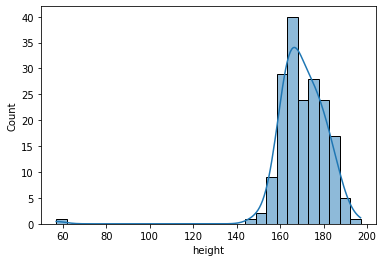

In [37]:
sea.histplot(data["height"], kde=True)

<AxesSubplot:xlabel='weight', ylabel='Count'>

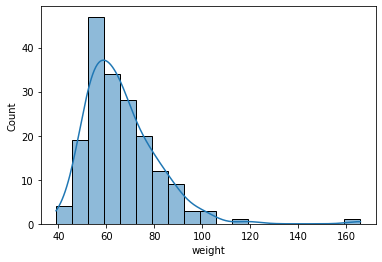

In [38]:
sea.histplot(data["weight"], kde = True)

In [40]:
male = data[data["sex"] == 'M']
female = data[data["sex"] == 'F']

male.head(), female.head()

(  sex  weight  height  repwt  repht
 0   M      77     182   77.0  180.0
 3   M      68     177   70.0  175.0
 5   M      76     170   76.0  165.0
 6   M      76     167   77.0  165.0
 7   M      69     186   73.0  180.0,
    sex  weight  height  repwt  repht
 1    F      58     161   51.0  159.0
 2    F      53     161   54.0  158.0
 4    F      59     157   59.0  155.0
 11   F     166      57   56.0  163.0
 12   F      51     161   52.0  158.0)

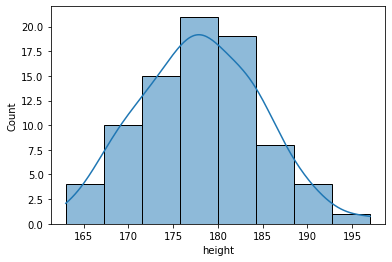

In [41]:
sea.histplot(male['height'], kde = True);

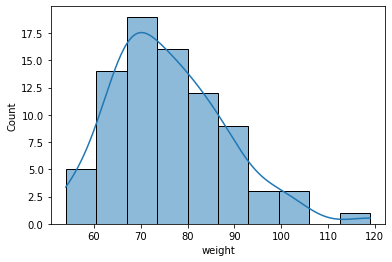

In [42]:
sea.histplot(male["weight"], kde = True);

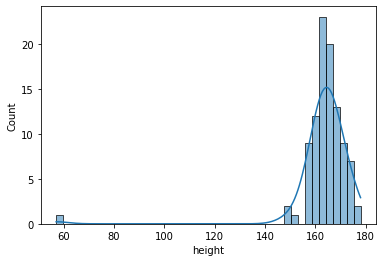

In [43]:
sea.histplot(female["height"], kde = True);

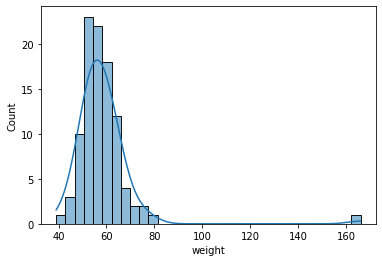

In [44]:
sea.histplot(female["weight"], kde = True);

In [61]:
train.replace({'M': 0, 'F': 1}, inplace=True)
test.replace({'M': 0, 'F': 1}, inplace=True)

train.head(), test.head()

(     sex  weight  height  repwt  repht
 194    1      62     164   61.0  161.0
 39     0      65     187   67.0  188.0
 101    0      63     178   63.0  175.0
 154    1      48     163   44.0  160.0
 100    1      55     164   55.0  163.0,
      sex  weight  height  repwt  repht
 90     0      70     173   68.0  170.0
 86     0      62     178   66.0  175.0
 94     0      88     189   87.0  185.0
 160    1      51     163   50.0  160.0
 121    0      69     167   73.0  165.0)

In [63]:
train_set1 = train.loc[:, ["height", "weight"]].to_numpy()
train_set2 = train["sex"].to_numpy()

In [64]:
clf = LogisticRegression().fit(train_set1, train_set2)
clf.score(train_set1, train_set2)

0.9007633587786259

In [65]:
test_set1 = test["sex"].to_numpy()
test_set2 = test.loc[:, ["height", "weight"]].to_numpy()
pred = clf.predict(test_set2)

In [66]:
accuracy_score(pred, test_set1)

0.9

In [69]:
#2.2
data = pnd.read_excel("Folds5x2_pp.xlsx", sheet_name = "Sheet1")
data.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [72]:
validation1, test = train_test_split(data, test_size = 0.3)
train, validation = train_test_split(validation1, test_size = 0.3)
train.shape, validation.shape, test.shape

((4687, 5), (2010, 5), (2871, 5))

In [74]:
ytrain = train["PE"].to_numpy()
xtrain = train.drop(["PE"], axis=1).to_numpy()
yvalid = validation["PE"].to_numpy()
xvalid = validation.drop(["PE"], axis=1).to_numpy()
ytest = test["PE"].to_numpy()
xtest = test.drop(["PE"], axis=1).to_numpy()

In [78]:
regress = LinearRegression().fit(xvalid, yvalid)
print(regress.score(xvalid, yvalid))
predval = regress.predict(xvalid)
mean_squared_error(predval, yvalid)

0.9300519100774074


20.279883835415674

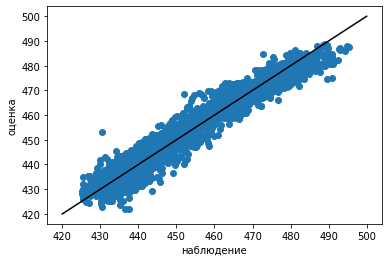

In [81]:
plt.scatter(yvalid, predval)
plt.xlabel("наблюдение")
plt.ylabel("оценка")
f = lambda x: x
x = nmp.linspace(420, 500,5)
plt.plot(x, f(x), color="000000")
